In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("food_alerts.db")

In [3]:
df = pd.read_sql_query("SELECT * FROM food_alerts", conn)

In [4]:
df.head()

,id,entry,type,date,business,pathogen,allergen,risk_statement,number_products_affected,is_published
0,1,http://data.food.gov.uk/food-alerts/id/FSA-PRI...,PRIN,2018-01-18,James Hall,,,The products listed above might be contaminate...,2,1
1,2,http://data.food.gov.uk/food-alerts/id/FSA-AA-...,Alert,2018-01-22,Morrisons,,Egg,"Egg, Mustard\nThis product contains egg and mu...",1,1
2,3,http://data.food.gov.uk/food-alerts/id/FSA-AA-...,Alert,2018-01-25,Marks & Spencer,,Gluten,Gluten\nThis product contains gluten making it...,1,1
3,4,http://data.food.gov.uk/food-alerts/id/FSA-AA-...,Alert,2018-01-26,Community Foods,,Milk,"Milk\nThis product contains milk, making it a ...",1,1
4,5,http://data.food.gov.uk/food-alerts/id/FSA-AA-...,Alert,2018-01-27,Boots,,Milk,"Milk\nThis product contains milk, making it a ...",1,1


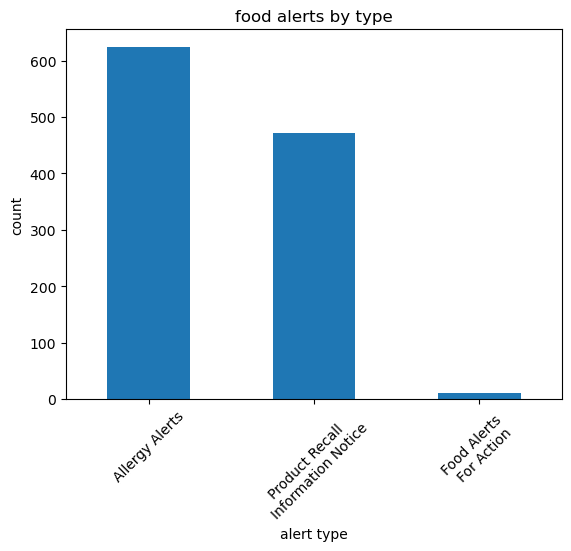

In [19]:
fig = df["type"].value_counts().plot(kind="bar")
fig.set_xticklabels(["Allergy Alerts", "Product Recall \nInformation Notice", "Food Alerts \nFor Action"])
plt.xticks(rotation=45)
fig.set_xlabel("alert type")
fig.set_ylabel("count")
plt.title("food alerts by type")
plt.show()

In [18]:
df["type"].value_counts()

type
Alert    624
PRIN     472
FAFA      11
Name: count, dtype: int64

In [6]:
df[df["type"]=="FAFA"].count().iloc[0]

11

The most common alert type was allergy alerts making up just over 600 of the alerts, followed by Product Recall Information Notices (PRINs) making up just under 500 of the alerts. Food alerts for action are rare, only 11 occurred in entire period provided by the API from early January, which reflects that it is uncommon for the authorities to get involved with food alerts.

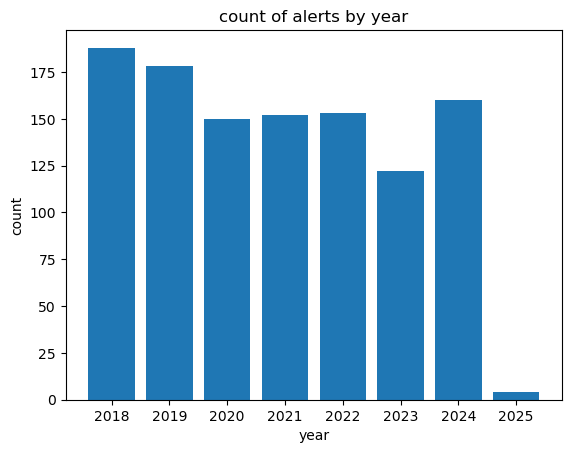

In [7]:
df6 = pd.Series(pd.to_datetime(df["date"]).dt.year).value_counts()
df6 = df6.reset_index()
fig, ax = plt.subplots()
ax.bar(x=df6["date"], height=df6["count"])
ax.set_xlabel("year")
ax.set_ylabel("count")
plt.title("count of alerts by year")
plt.show()

there has been a general trend of decreasing number of alerts every year, however in 2024 the number of alerts greatly exceeded that of 2023.

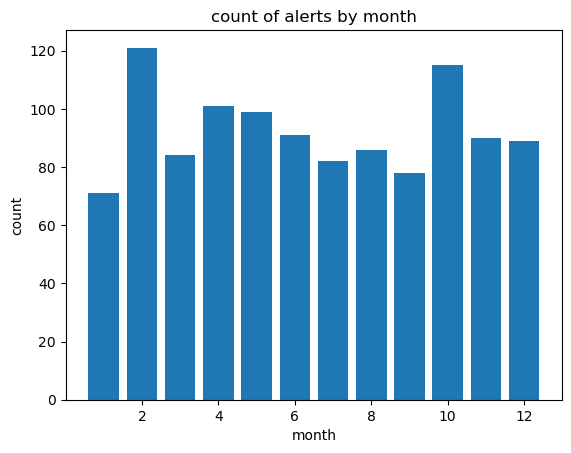

In [8]:
df7 = pd.Series(pd.to_datetime(df["date"]).dt.month).value_counts()
df7 = df7.reset_index()
fig, ax = plt.subplots()
ax.bar(x=df7["date"], height=df7["count"])
ax.set_xlabel("month")
ax.set_ylabel("count")
plt.title("count of alerts by month")
plt.show()

there is no clear relationship between month and the number of alerts

In [9]:
df["business"].value_counts().head(20)

business
                         60
Tesco                    51
Lidl GB                  33
Sainsbury’s              29
Waitrose                 28
Co-op                    26
Asda                     24
Morrisons                21
Lidl                     17
Aldi                     17
FGS Ingredients Ltd      15
Iceland                  14
Dunnes Stores            13
Waitrose & Partners      13
Marks & Spencer          12
Lidl Ireland              9
SPAR                      9
Unilever                  8
Liroy B.V.                7
Lidl Northern Ireland     6
Name: count, dtype: int64

The most common businesses to report food alerts were the major supermarkets, the most common being Tesco with 51 food alerts in total, likely reflecting its greater market share and higher customer numbers. The supplier in the UK with the most food alerts was FGS Ingredients Ltd with 15 alerts in the period between Jan 2018 and Jan 2025.

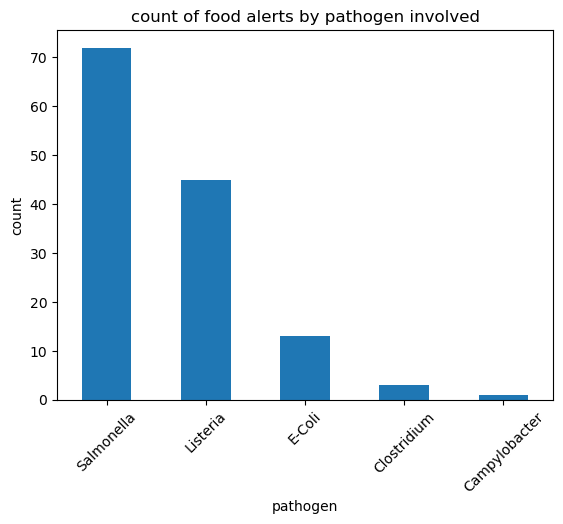

In [10]:
df4 = df[df["pathogen"]!=""]["pathogen"].value_counts()
fig = df4.plot(kind="bar")
fig.set_xticklabels(["Salmonella", "Listeria", "E-Coli", "Clostridium", "Campylobacter"])
plt.xticks(rotation=45)
fig.set_xlabel("pathogen")
fig.set_ylabel("count")
fig.set_title("count of food alerts by pathogen involved")
plt.show()

In [11]:
df4

pathogen
http://data.food.gov.uk/codes/alerts/def/pathogen/salmonella       72
http://data.food.gov.uk/codes/alerts/def/pathogen/listeria         45
http://data.food.gov.uk/codes/alerts/def/pathogen/e-coli           13
http://data.food.gov.uk/codes/alerts/def/pathogen/clostridium       3
http://data.food.gov.uk/codes/alerts/def/pathogen/campylobacter     1
Name: count, dtype: int64

Salmonella was the most common pathogen to feature in food alerts (72 instances), followed by listeria (45 instances) and then by E-Coli (13 instances). There have only been 3 alerts related to clostridium and 1 alert related to campylobacter.

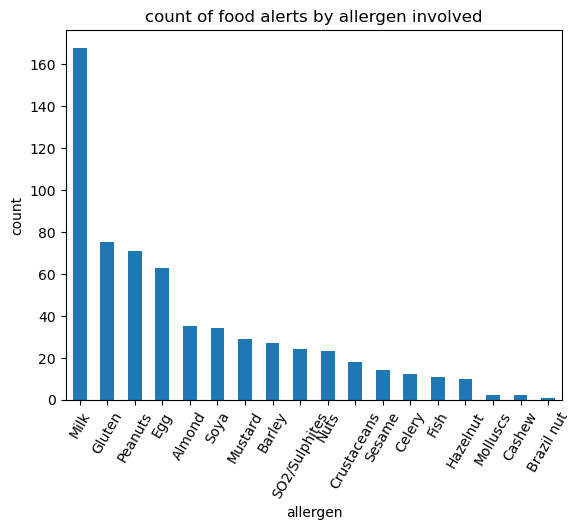

In [12]:
df5 = df[df["allergen"]!=""]["allergen"].value_counts()
df5 = df5.rename(index={'Sulphur dioxide and/or sulphites':'SO2/Sulphites'})
fig = df5.plot(kind="bar")
plt.xticks(rotation=60)
fig.set_xlabel("allergen")
fig.set_ylabel("count")
fig.set_title("count of food alerts by allergen involved")
plt.show()

In [13]:
df5

allergen
Milk             168
Gluten            75
Peanuts           71
Egg               63
Almond            35
Soya              34
Mustard           29
Barley            27
SO2/Sulphites     24
Nuts              23
Crustaceans       18
Sesame            14
Celery            12
Fish              11
Hazelnut          10
Molluscs           2
Cashew             2
Brazil nut         1
Name: count, dtype: int64

Milk was by far the most common allergy alert (168 instances). Gluten, Peanuts and Egg made up a significant amount of the rest of the allergy alerts (75, 71 and 63 instances respectively).  

In [14]:
products_affected = pd.to_numeric(df["number_products_affected"], errors="coerce").dropna().value_counts()
products_affected

number_products_affected
1.0      696
2.0      130
3.0       63
4.0       38
5.0       33
        ... 
28.0       1
101.0      1
45.0       1
47.0       1
190.0      1
Name: count, Length: 65, dtype: int64

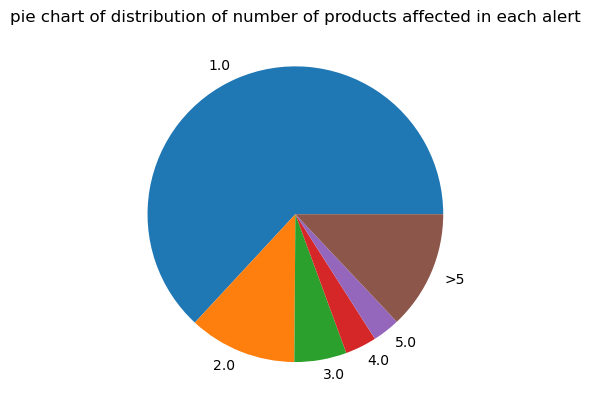

In [15]:
dict_2 = products_affected.iloc[:5].to_dict()
dict_2[">5"] = products_affected.iloc[5:].sum()
plt.pie(x=dict_2.values(), labels=dict_2.keys(), )
plt.title("pie chart of distribution of number of products affected in each alert")
plt.show()

In [16]:
pd.to_numeric(df["number_products_affected"], errors="coerce").dropna().describe()

count    1103.000000
mean        6.480508
std        21.870667
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       190.000000
Name: number_products_affected, dtype: float64

5/8ths of alerts affected only a single product, one quarter of alerts affected 2-5 products, and 1/8th of alerts affected most than 5 products. There was a wide variety to the number of products affected, although the mean was only 6.4 products affected per alert, a maximum of 190 products for a single alert was recorded.

In [17]:
df["is_published"].sum()/df["is_published"].count()

1.0

The above calculation shows 100% of the alerts have been published and not withdrawn, which fits what has been seen on a manual inspection of a sample of the data.